In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import calendar
from datetime import datetime
from datetime import date
import pickle 



In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.shape

(12980, 12)

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [8]:
test.shape

(4399, 11)

In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


No misssing values.

season,hoilday,workingday,weather= Catagorical variable

temp.atemp,humidity,windspeed,casual,registered,count= Continous variabale

In [13]:
train['season'].mode()

0    2
Name: season, dtype: int64

Summer has higher frequency.

In [14]:
train['holiday'].mode()

0    0
Name: holiday, dtype: int64

Most of the days are not holidays. which give us inferenece that most of the rentals werer taken on working day

In [15]:
train['workingday'].mode()

0    1
Name: workingday, dtype: int64

hence we confirm ,working day has higher chance for rentals.

In [16]:
train['count'].max()


957

In [17]:
train[train['count']==957]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10622,2012-03-23 17:00:00,2,0,1,2,29.52,32.575,42.0,11.0014,264,693,957


highest count was on 2012-03-23 17:00:00 in summer. majority of them were registered.

In [18]:
train['count'].min()

1

In [19]:
data1=train[train['count']==1]
data1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
30,2011-01-02 7:00:00,1,0,0,2,16.40,20.455,76.0,12.9980,0,1,1
49,2011-01-03 4:00:00,1,0,1,1,6.56,6.820,47.0,26.0027,0,1,1
71,2011-01-04 2:00:00,1,0,1,1,5.74,7.575,63.0,8.9981,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10920,2012-04-05 4:00:00,2,0,1,1,15.58,19.695,43.0,19.0012,0,1,1
11087,2012-04-12 4:00:00,2,0,1,1,12.30,14.395,61.0,15.0013,0,1,1
11304,2012-04-21 5:00:00,2,0,0,1,20.50,24.240,82.0,16.9979,0,1,1
11350,2012-04-23 3:00:00,2,0,1,2,13.12,15.150,81.0,19.0012,0,1,1


In [20]:
data1[data1['season']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
30,2011-01-02 7:00:00,1,0,0,2,16.40,20.455,76.0,12.9980,0,1,1
49,2011-01-03 4:00:00,1,0,1,1,6.56,6.820,47.0,26.0027,0,1,1
71,2011-01-04 2:00:00,1,0,1,1,5.74,7.575,63.0,8.9981,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10178,2012-03-05 4:00:00,1,0,1,1,8.20,11.365,55.0,6.0032,0,1,1
10201,2012-03-06 3:00:00,1,0,1,1,7.38,8.335,51.0,19.0012,0,1,1
10274,2012-03-09 4:00:00,1,0,1,3,16.40,20.455,66.0,19.0012,0,1,1
10367,2012-03-13 2:00:00,1,0,1,3,21.32,25.000,72.0,19.9995,0,1,1


In [21]:
data1[data1['season']==2].shape

(28, 12)

In [22]:
data1[data1['season']==3].shape

(6, 12)

In [23]:
data1[data1['season']==4].shape

(11, 12)

Out of 149 rows of rental having only 1rental/hour

104 hours were for season 1=spring ,28 hours for summer,6 hours for fall,11 hours for winter 

In [24]:
train[train['count']>=900]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10622,2012-03-23 17:00:00,2,0,1,2,29.52,32.575,42.0,11.0014,264,693,957
12900,2012-06-26 17:00:00,3,0,1,1,29.52,32.575,28.0,27.9993,104,796,900


In [25]:
train['temp'].mean()

19.725422187981508

Average temperature is about 19.72

In [26]:
train['windspeed'].mean()

13.141760423728813

Average windspeed is 13.14

In [27]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [28]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [29]:
train["season"].mode()

0    2
Name: season, dtype: int64

(array([3980.,    0.,    0., 4409.,    0.,    0., 2457.,    0.,    0.,
        2134.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

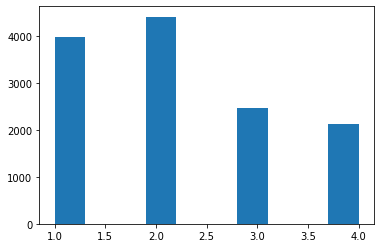

In [30]:
plt.hist(train['season'])


Summer season contributes most of the time followed by spring.

(array([12623.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

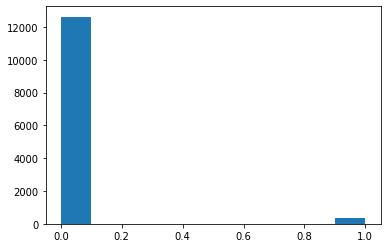

In [31]:
plt.hist(train['holiday'])

(array([4076.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8904.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

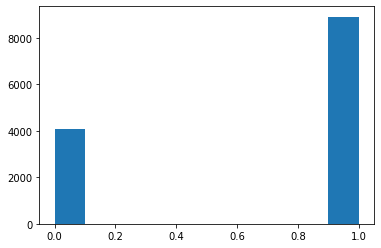

In [32]:
plt.hist(train['workingday'])

(array([8.576e+03, 0.000e+00, 0.000e+00, 3.273e+03, 0.000e+00, 0.000e+00,
        1.128e+03, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

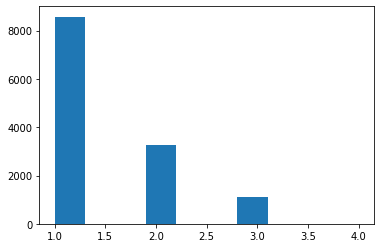

In [33]:
plt.hist(train['weather'])

Since weather is not defined in the problem statement we make assumption from the season that mostly it was summer season so, we can denot 1.0 as sunny day. Followe by 2.0 as windy

(array([ 117.,  902., 1839., 2197., 1528., 2003., 2242., 1524.,  528.,
         100.]),
 array([ 0.82 ,  4.756,  8.692, 12.628, 16.564, 20.5  , 24.436, 28.372,
        32.308, 36.244, 40.18 ]),
 <BarContainer object of 10 artists>)

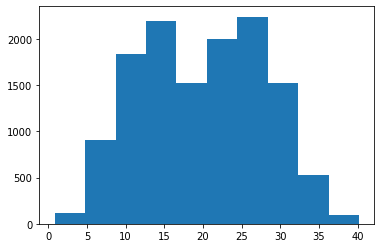

In [34]:
plt.hist(train['temp'],bins=10)

Temp rangin from 10 to 30 constitute most of the data.

(array([  23.,   50.,  538., 1246., 1983., 2086., 1950., 1981., 2100.,
        1023.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

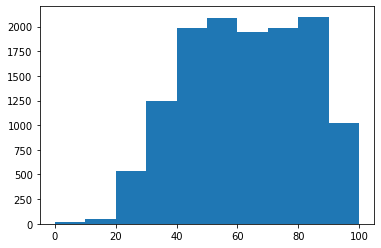

In [35]:
plt.hist(train['humidity'])

40 to 90 is the frequently occuring humidity.

(array([1525., 4677., 3339., 1950.,  939.,  355.,  142.,   38.,    9.,
           6.]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

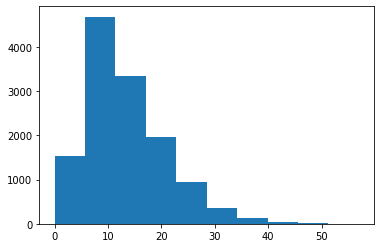

In [36]:
plt.hist(train['windspeed'],bins=10)

Frequently occuring windspeed is between 5-20

(array([9.255e+03, 2.138e+03, 7.290e+02, 3.440e+02, 2.160e+02, 1.320e+02,
        9.100e+01, 5.300e+01, 1.300e+01, 9.000e+00]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

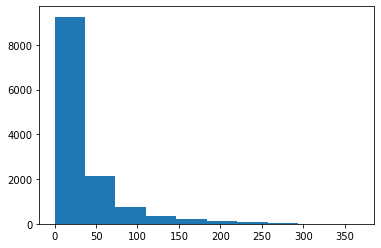

In [37]:
plt.hist(train['casual'])

(array([5467., 3231., 2034., 1057.,  483.,  321.,  199.,   97.,   70.,
          21.]),
 array([  0. ,  79.6, 159.2, 238.8, 318.4, 398. , 477.6, 557.2, 636.8,
        716.4, 796. ]),
 <BarContainer object of 10 artists>)

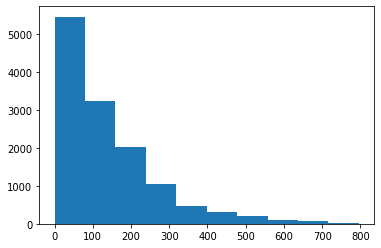

In [38]:
plt.hist(train['registered'])

(array([5557., 2966., 1913., 1113.,  666.,  405.,  219.,   88.,   47.,
           6.]),
 array([  1. ,  96.6, 192.2, 287.8, 383.4, 479. , 574.6, 670.2, 765.8,
        861.4, 957. ]),
 <BarContainer object of 10 artists>)

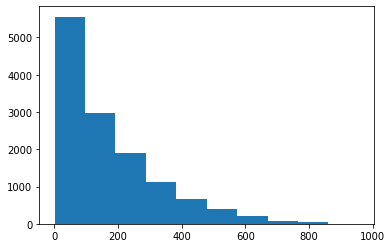

In [39]:
plt.hist(train['count'])

histogram plot for count and registered resembles

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

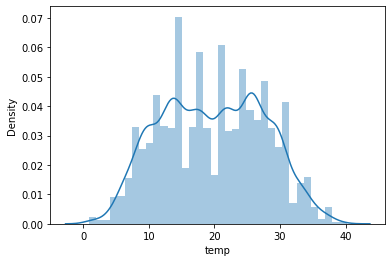

In [40]:
sns.distplot(train['temp'])

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

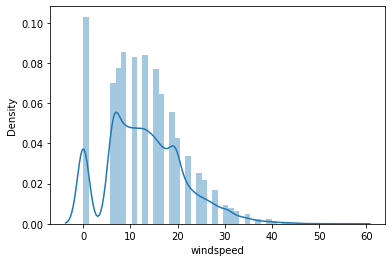

In [41]:
sns.distplot(train['windspeed'])

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


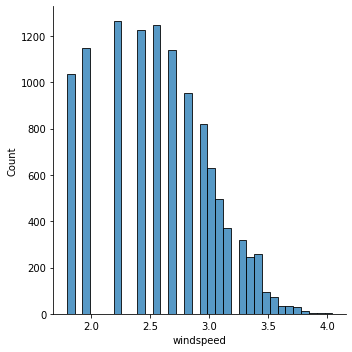

In [42]:
sns.displot(np.log(train['windspeed']))

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

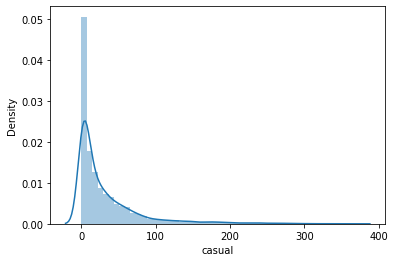

In [43]:
sns.distplot(train['casual'])

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


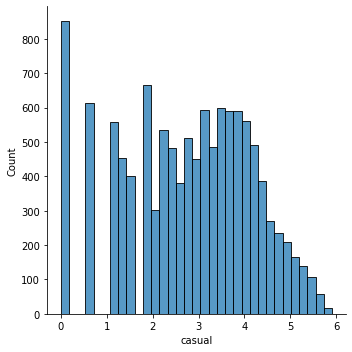

In [44]:
sns.displot(np.log(train['casual']))

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

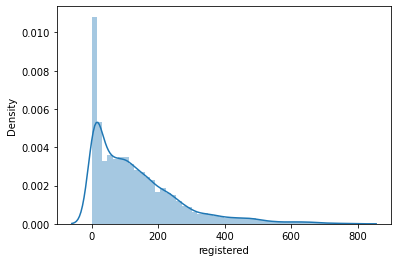

In [45]:
sns.distplot(train['registered'])

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='registered', ylabel='Count'>

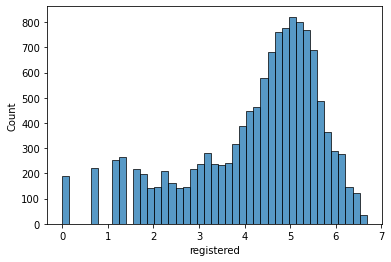

In [46]:
sns.histplot(np.log(train['registered']))

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

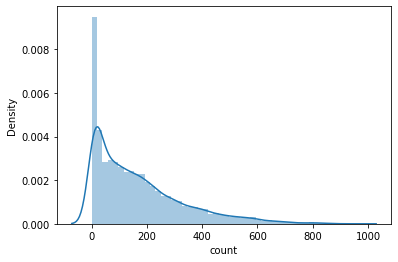

In [47]:
sns.distplot(train['count'])

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

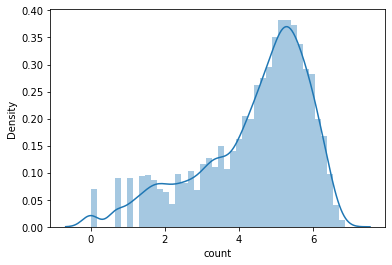

In [48]:
sns.distplot(np.log(train['count']))

The logrithmatic distribution plot of count  is a left skewed distribution plot.

<AxesSubplot:xlabel='temp'>

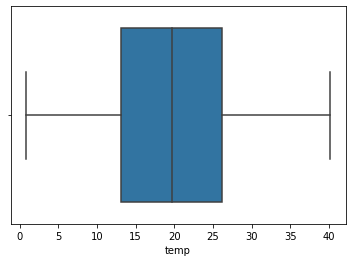

In [49]:
sns.boxplot(x='temp',data=train)

In [50]:
q1=train['temp'].quantile(0.25)
q1

13.12

In [51]:
q3=train['temp'].quantile(0.75)
q3

26.24

50% of the temp data lies between 13.12 to 26.24

<AxesSubplot:xlabel='windspeed'>

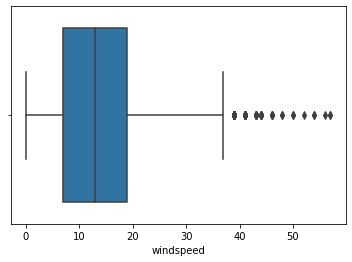

In [52]:
sns.boxplot(x='windspeed',data=train)

In [53]:
windq1=train['windspeed'].quantile(0.25)
windq1


7.0015

In [54]:
windq3=train['windspeed'].quantile(0.75)
windq3

19.0012

50% of the hunidity lies from 7 to 19.001

<AxesSubplot:xlabel='count'>

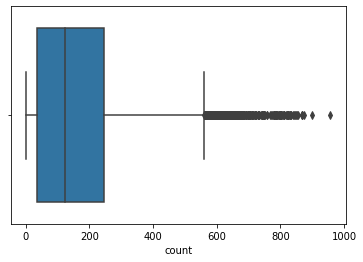

In [55]:
sns.boxplot(x='count',data=train)

In [56]:
train['count'].quantile(0.25)

35.0

In [57]:
train['count'].quantile(0.75)

245.0

half of the values of count is in between 35 to 245

<AxesSubplot:xlabel='humidity'>

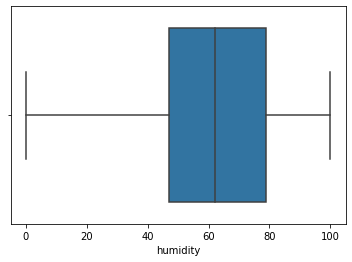

In [58]:
sns.boxplot(x='humidity',data=train)

In [59]:
train['humidity'].quantile(0.25)


47.0

In [60]:
train['humidity'].quantile(0.75)

79.0

half of the humidity values lies between 47 to 79

<AxesSubplot:xlabel='season', ylabel='count'>

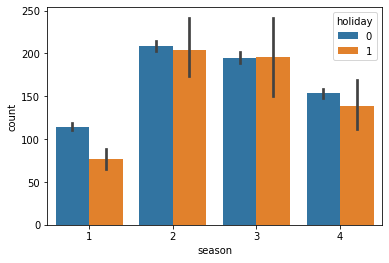

In [61]:
sns.barplot(x='season',y='count',data=train, hue=train['holiday'])

season 2 and 3 (summer and fall) have higher counts and counts on holiday and working day are comparable.

<AxesSubplot:xlabel='season', ylabel='count'>

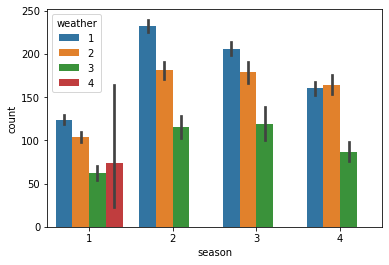

In [62]:
sns.barplot(x='season',y='count',data=train, hue=train['weather'])

for summer and fall ,count is higher for weather 1 followed by 2&3 but for weather 4 its =0 for summer ,fall,and winter

<AxesSubplot:xlabel='holiday', ylabel='count'>

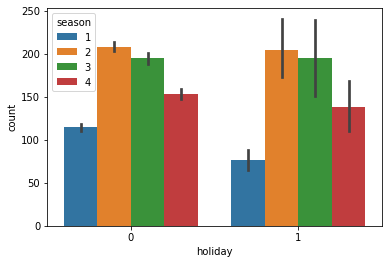

In [63]:
sns.barplot(x='holiday',y='count',data=train, hue=train['season'])

<AxesSubplot:xlabel='holiday', ylabel='count'>

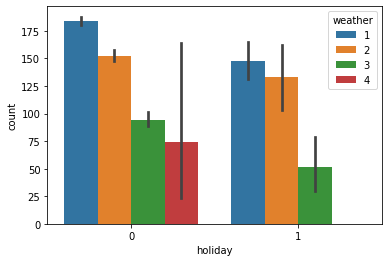

In [64]:
sns.barplot(x='holiday',y='count',data=train, hue=train['weather'])

if its holiday and the weather is 4 the count is null which indicates poor demand for rental at that time

<AxesSubplot:xlabel='workingday', ylabel='count'>

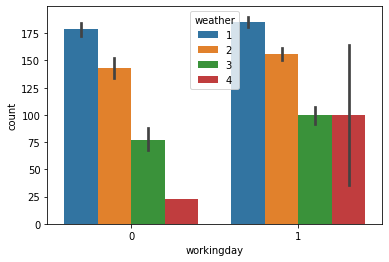

In [65]:
sns.barplot(x='workingday',y='count',data=train, hue=train['weather'])

<AxesSubplot:xlabel='workingday', ylabel='count'>

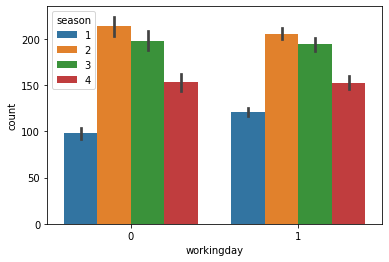

In [66]:
sns.barplot(x='workingday',y='count',data=train, hue=train['season'])

<AxesSubplot:xlabel='weather', ylabel='count'>

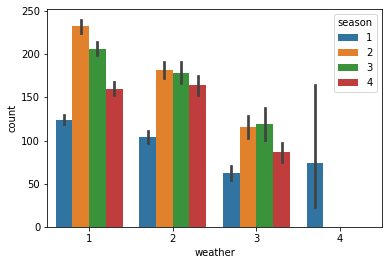

In [67]:
sns.barplot(x='weather',y='count',data=train, hue=train['season'])

for weather 4 only season 1(spring) has demand for rental bike. As for we can reduce the operational cost during spring

<AxesSubplot:xlabel='weather', ylabel='count'>

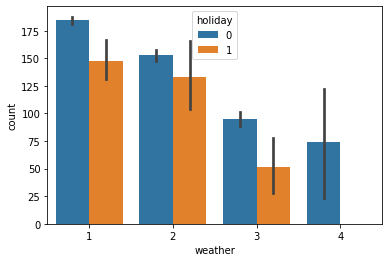

In [68]:
sns.barplot(x='weather',y='count',data=train, hue=train['holiday'])

also for weather if its a holiday then 0 demand is reported

<AxesSubplot:xlabel='weather', ylabel='count'>

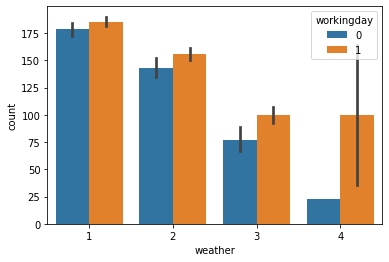

In [69]:
sns.barplot(x='weather',y='count',data=train, hue=train['workingday'])

In [70]:
pd.crosstab(train.season,train.holiday)

holiday,0,1
season,,
1,3839,141
2,4313,96
3,2409,48
4,2062,72


In [71]:
pd.crosstab(train.season,train.workingday)

workingday,0,1
season,,
1,1329,2651
2,1343,3066
3,708,1749
4,696,1438


In [72]:
pd.crosstab(train.season,train.weather)

weather,1,2,3,4
season,,,,
1,2548,1096,333,3
2,2859,1144,406,0
3,1813,493,151,0
4,1356,540,238,0


In [73]:
pd.crosstab(train.holiday,train.workingday)

workingday,0,1
holiday,,
0,3719,8904
1,357,0


In [74]:
pd.crosstab(train.holiday,train.weather)

weather,1,2,3,4
holiday,,,,
0,8330,3178,1112,3
1,246,95,16,0


In [75]:
corr=train.corr()

In [76]:
corr1=corr>=0.5

In [77]:
corr1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,True,False,False,False,False,False,False,False,False,False,False
holiday,False,True,False,False,False,False,False,False,False,False,False
workingday,False,False,True,False,False,False,False,False,False,False,False
weather,False,False,False,True,False,False,False,False,False,False,False
temp,False,False,False,False,True,True,False,False,False,False,False
atemp,False,False,False,False,True,True,False,False,False,False,False
humidity,False,False,False,False,False,False,True,False,False,False,False
windspeed,False,False,False,False,False,False,False,True,False,False,False
casual,False,False,False,False,False,False,False,False,True,True,True
registered,False,False,False,False,False,False,False,False,True,True,True


<AxesSubplot:xlabel='registered', ylabel='count'>

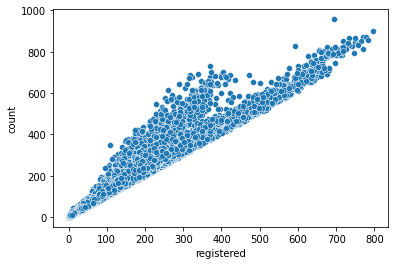

In [78]:
sns.scatterplot(x="registered",y="count", data=train)

Relation between registerd and count clearly has a linear relationship. So as the registered customers increases there is a high chance of increased demand in rental of bikes.

<AxesSubplot:xlabel='casual', ylabel='count'>

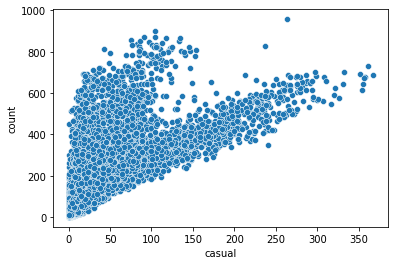

In [79]:
sns.scatterplot(x="casual",y="count", data=train)

as casual customers increases the rentals also increases

<AxesSubplot:xlabel='windspeed', ylabel='count'>

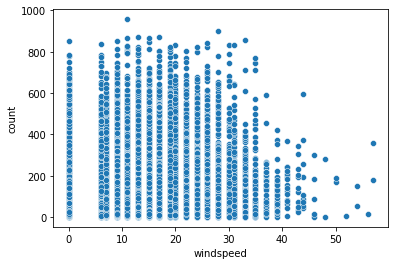

In [80]:
sns.scatterplot(x="windspeed",y="count", data=train)

<AxesSubplot:xlabel='humidity', ylabel='count'>

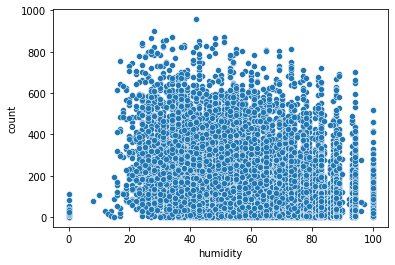

In [81]:
sns.scatterplot(x="humidity",y="count", data=train)

<AxesSubplot:xlabel='temp', ylabel='count'>

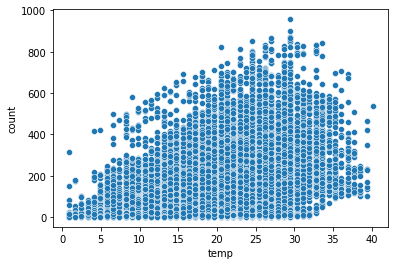

In [82]:
sns.scatterplot(x="temp",y="count", data=train)

<AxesSubplot:xlabel='temp', ylabel='registered'>

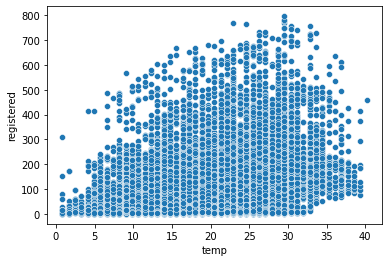

In [83]:
sns.scatterplot(x="temp",y="registered", data=train)

<AxesSubplot:xlabel='temp', ylabel='casual'>

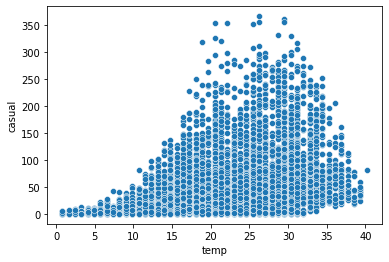

In [84]:
sns.scatterplot(x="temp",y="casual", data=train)

<AxesSubplot:>

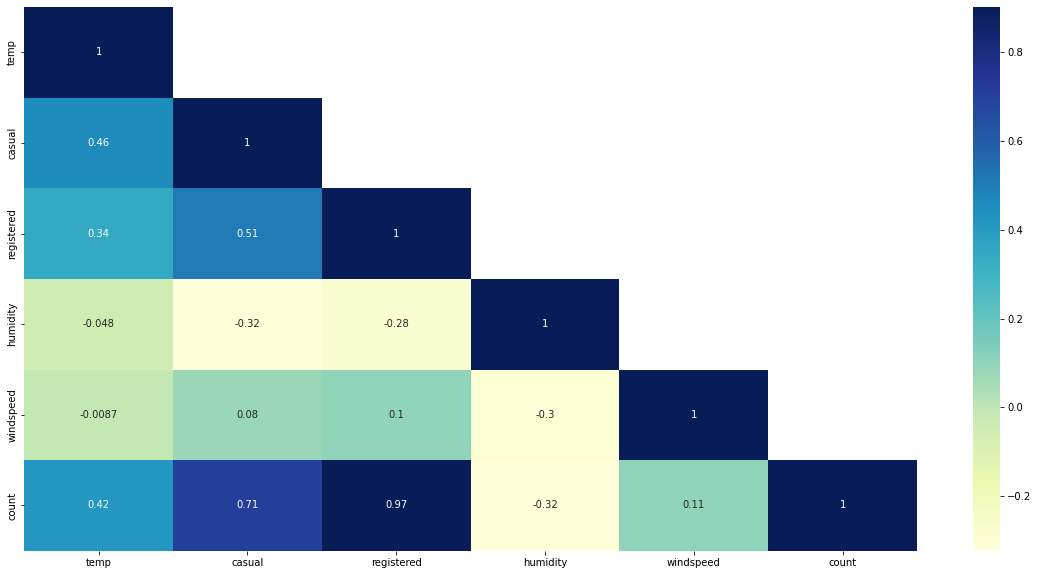

In [85]:
corr = train[["temp","casual","registered","humidity","windspeed","count"]].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=False, annot=True, cmap="YlGnBu")


insights from correlation chart:

1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".

2. windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

3. Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

extracting some new features using the datetime variable. We can extract the date, hour, month.

In [86]:
train["date"]=train.datetime.apply(lambda x: x.split()[0])
train["time"]=train.datetime.apply(lambda x: x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,2012-06-29,20,6
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,2012-06-29,21,6
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,2012-06-29,22,6
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,2012-06-29,23,6


In [87]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

let us  create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set. 

In [88]:
training=train[train['datetime']<='2012-03-30 00:00:00']
validation=train[train['datetime']>'2012-03-30 00:00:00']
training

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,2012-03-29 19:00:00,2,0,1,1,19.68,23.485,39.0,19.0012,47,421,468,2012-03-29,19,3
10769,2012-03-29 20:00:00,2,0,1,1,18.86,22.725,38.0,19.9995,34,301,335,2012-03-29,20,3
10770,2012-03-29 21:00:00,2,0,1,1,18.04,21.970,44.0,19.0012,10,214,224,2012-03-29,21,3
10771,2012-03-29 22:00:00,2,0,1,1,17.22,21.210,44.0,19.0012,17,135,152,2012-03-29,22,3


we will drop the date time variable and a temp variable as we have decided abov eto remove them.




In [89]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

### Model building

In [90]:
##linear regression

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model1= LinearRegression()

will remove the target variable from training model and keep it on validation set. We also take log of count value as we have seen log distribution chart gave us a  left skewed dist. graph

In [93]:
x_train=training.drop('count', axis=1)
y_train= np.log(training['count'])
x_val = validation.drop('count', axis=1)
y_val = np.log(validation['count'])

In [94]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10773, 11), (10773,), (2207, 11), (2207,))

In [95]:
model1.fit(x_train,y_train)

LinearRegression()

In [96]:
prediction1 = model1.predict(x_val)

defining the rmsle function

In [97]:
def rmsle(y, y_):
    y = np.exp(y),  
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [98]:
rmsle(y_val,prediction1)

0.8876469542289628

rmsle value should be close to 0 for an efficient model but her it's not so lets try other models

In [99]:
test_prediction1 = model1.predict(test)

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- hour
Feature names seen at fit time, yet now missing:
- time

  warnings.warn(message, FutureWarning)


In [100]:
test_prediction1

array([3.25020161, 3.26666189, 3.05708414, ..., 4.30200224, 4.1438553 ,
       4.08274552])

## Decision tree


In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [103]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [104]:
prediction2 = dt_reg.predict(x_val)

In [105]:
rmsle(y_val, prediction2)

0.17134338947669225

rmsle value is close to 0 which means our model efficiency has increased.

In [106]:
test_prediction2 = dt_reg.predict(test)

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- hour
Feature names seen at fit time, yet now missing:
- time

  warnings.warn(message, FutureWarning)


Now we create a csv file to save this prediction

In [107]:
final_prediction = np.exp(test_prediction2)

In [108]:
submission = pd.DataFrame()

In [109]:
submission['count'] = final_prediction


In [110]:
submission.to_csv('submission.csv', header=True, index=False)

In [ ]:
loading it into pickle file

In [111]:
pickle.dump(dt_reg, open('model.pkl','wb'))

In [115]:
model = pickle.load(open('model.pkl','rb'))